In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from google.colab import files

# 1. Memuat Dataset
uploaded = files.upload()
df = pd.read_csv('CreditDataset.csv')

print(df.head())

Saving CreditDataset.csv to CreditDataset.csv
    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


In [2]:
# 2. Pemrosesan awal
# Pengkodean label untuk kolom kategorikal
le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Dengan asumsi 'x1' adalah kolom target untuk klasifikasi
X = df.drop('x1', axis=1)  # Fitur (semua kolom kecuali target)
y = df['x1']  # Target

# Membagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 3. Melatih Pengklasifikasi Pohon Keputusan
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 4. Melatih Pengklasifikasi K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Dapat menyetel jumlah tetangga
knn_model.fit(X_train, y_train)

# 5. Membuat prediksi
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [4]:
# 6. Mengevaluasi model
# Untuk keputusan model tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Gunakan predict_proba untuk mendapatkan prediksi probabilitas untuk ROC-AUC
y_pred_proba_dt = dt_model.predict_proba(X_test)

# Menghitung AUC-ROC untuk Pohon Keputusan
auc_dt = roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr', average='weighted')

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"AUC-ROC: {auc_dt:.4f}")

# Untuk K-Nearest Neighbors (K-NN)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

y_pred_proba_knn = knn_model.predict_proba(X_test)

# Hitung AUC-ROC untuk K-NN
auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr', average='weighted')

print("\nK-NN Results:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"AUC-ROC: {auc_knn:.4f}")

Decision Tree Results:
Accuracy: 0.4100
Precision: 0.4146
Recall: 0.4100
F1 Score: 0.4073
AUC-ROC: 0.5799

K-NN Results:
Accuracy: 0.3050
Precision: 0.2913
Recall: 0.3050
F1 Score: 0.2960
AUC-ROC: 0.4990


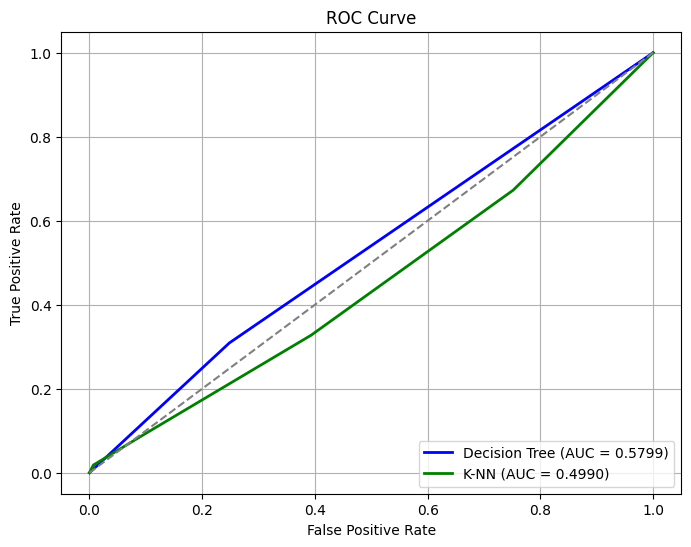

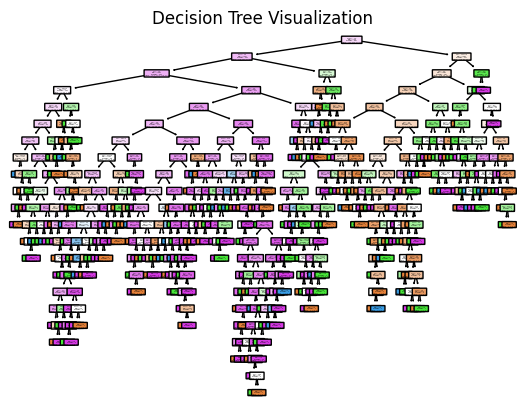

In [5]:
# 7. Plot Kurva ROC untuk kedua model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt[:, 1], pos_label=1)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn[:, 1], pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.4f})".format(auc_dt), color='blue', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label="K-NN (AUC = {:.4f})".format(auc_knn), color='green', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Mendapatkan kelas unik dari variabel target
unique_classes = np.unique(y)

# Membuat pohon keputusan
tree.plot_tree(dt_model, feature_names=X.columns, class_names=list(map(str, unique_classes)), filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()